#  Deep Learning and Image Recognition

## Exercise 4 - ANN Classification to predict diabetes

## Duo Zhou

Use ANN to make predictions on stuructured data and then increase the complexity of the model.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7,7)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical

### Read data

In [13]:
#read in training data
df = pd.read_csv('diabetes_data.csv')

#view data structure
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#features
X = df.drop('diabetes', 1)

#one-hot encode target column
y_cat = to_categorical(df.diabetes)

#check that target column has been converted
y_cat[0:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

### Build Model

In [15]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = X.shape[1]

#add layers to model
model.add(Dense(20, activation='relu', input_shape=(n_cols,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='softmax'))

#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 42        
Total params: 1,062
Trainable params: 1,062
Non-trainable params: 0
_________________________________________________________________


In [17]:
my_callbacks = [
    EarlyStopping(patience=2),
    ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    TensorBoard(log_dir='logs'),
]

In [18]:
#train model
history = model.fit(X, y_cat, epochs=30, validation_split=0.2, callbacks=my_callbacks)

Train on 614 samples, validate on 154 samples
Epoch 1/30
614/614 [==============================] - 1s 2ms/sample - loss: 1.5284 - accuracy: 0.5896 - val_loss: 1.0819 - val_accuracy: 0.5844
Epoch 2/30
614/614 [==============================] - 0s 324us/sample - loss: 1.0068 - accuracy: 0.6433 - val_loss: 0.8536 - val_accuracy: 0.6104
Epoch 3/30
614/614 [==============================] - 0s 314us/sample - loss: 0.8528 - accuracy: 0.6417 - val_loss: 0.8246 - val_accuracy: 0.6169
Epoch 4/30
614/614 [==============================] - 0s 289us/sample - loss: 0.7639 - accuracy: 0.6596 - val_loss: 0.7571 - val_accuracy: 0.5974
Epoch 5/30
614/614 [==============================] - 0s 287us/sample - loss: 0.6853 - accuracy: 0.6775 - val_loss: 0.7488 - val_accuracy: 0.6623
Epoch 6/30
614/614 [==============================] - 0s 253us/sample - loss: 0.6663 - accuracy: 0.6808 - val_loss: 0.7226 - val_accuracy: 0.6623
Epoch 7/30
614/614 [==============================] - 0s 288us/sample - loss: 0.

### Plot Loss Curve

Text(0.5, 1.0, 'Loss Curves')

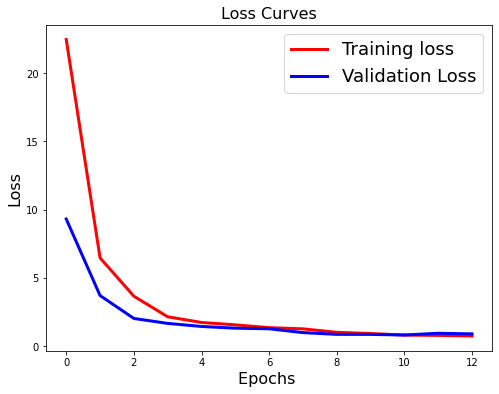

In [11]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)